# UTS MACHINE LEARNING AZMI TAQIUDDIN SYAH 1103213078


## Import libraries Yang Dibutuhkan

Library yang di butuhkan Sebagai Berikut

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [ ]:
column_names = ['tahun'] + [f'x{i}' for i in range(1, 91)]

In [ ]:
dataset = "/content/sample_data/RegresiUTSTelkom.csv"
data = pd.read_csv(dataset,names=column_names)

In [ ]:
data.head()

,tahun,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [ ]:
data.describe()

,tahun,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


In [ ]:
data.tail()

,tahun,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909
515344,2005,51.85726,59.11655,26.39436,-5.46030,-20.69012,-19.95528,-6.72771,2.29590,10.31018,...,-11.50511,-69.18291,60.58456,28.64599,-4.39620,-64.56491,-45.61012,-5.51512,32.35602,12.17352


In [ ]:
# View NaN values
print("Rows with NaN values:")
print(data[data.isna().any(axis=1)])

# View duplicates
print("\nDuplicate rows:")
print(data[data.duplicated()])

# Drop duplicates
data = data.drop_duplicates()




Rows with NaN values:
Empty DataFrame
Columns: [tahun, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23, x24, x25, x26, x27, x28, x29, x30, x31, x32, x33, x34, x35, x36, x37, x38, x39, x40, x41, x42, x43, x44, x45, x46, x47, x48, x49, x50, x51, x52, x53, x54, x55, x56, x57, x58, x59, x60, x61, x62, x63, x64, x65, x66, x67, x68, x69, x70, x71, x72, x73, x74, x75, x76, x77, x78, x79, x80, x81, x82, x83, x84, x85, x86, x87, x88, x89, x90]
Index: []

[0 rows x 91 columns]

Duplicate rows:
        tahun        x1        x2        x3        x4        x5        x6  \
5551     1973  41.22353   3.20571  43.66712   7.81090 -27.93823  -2.67931   
9941     1999  46.98706  38.24010  22.51761   7.24891  -3.88296  -5.25372   
9942     1998  43.28314  25.37917   6.80249  16.41132 -14.76744   3.84884   
10071    2006  45.88913   3.50835 -16.79630   2.95203 -12.71814 -10.46804   
17330    2008  31.59176 -43.16626 -53.11768  -7.08228  36.23470 -25.6

In [ ]:
print("\nData after dropping duplicates:")
print(data.tail())


Data after dropping duplicates:
        tahun        x1        x2        x3       x4        x5        x6  \
515340   2006  51.28467  45.88068  22.19582 -5.53319  -3.61835 -16.36914   
515341   2006  49.87870  37.93125  18.65987 -3.63581 -27.75665 -18.52988   
515342   2006  45.12852  12.65758 -38.72018  8.80882 -29.29985  -2.28706   
515343   2006  44.16614  32.38368  -3.34971 -2.49165 -19.59278 -18.67098   
515344   2005  51.85726  59.11655  26.39436 -5.46030 -20.69012 -19.95528   

              x7        x8        x9  ...       x81        x82        x83  \
515340   2.12652   5.18160  -8.66890  ...   4.81440   -3.75991  -30.92584   
515341   7.76108   3.56109  -2.50351  ...  32.38589  -32.75535  -61.05473   
515342 -18.40424 -22.28726  -4.52429  ... -18.73598  -71.15954 -123.98443   
515343   8.78428   4.02039 -12.01230  ...  67.16763  282.77624   -4.63677   
515344  -6.72771   2.29590  10.31018  ... -11.50511  -69.18291   60.58456   

              x84       x85       x86        x8

# EDA

<ipython-input-88-05c37db356bd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


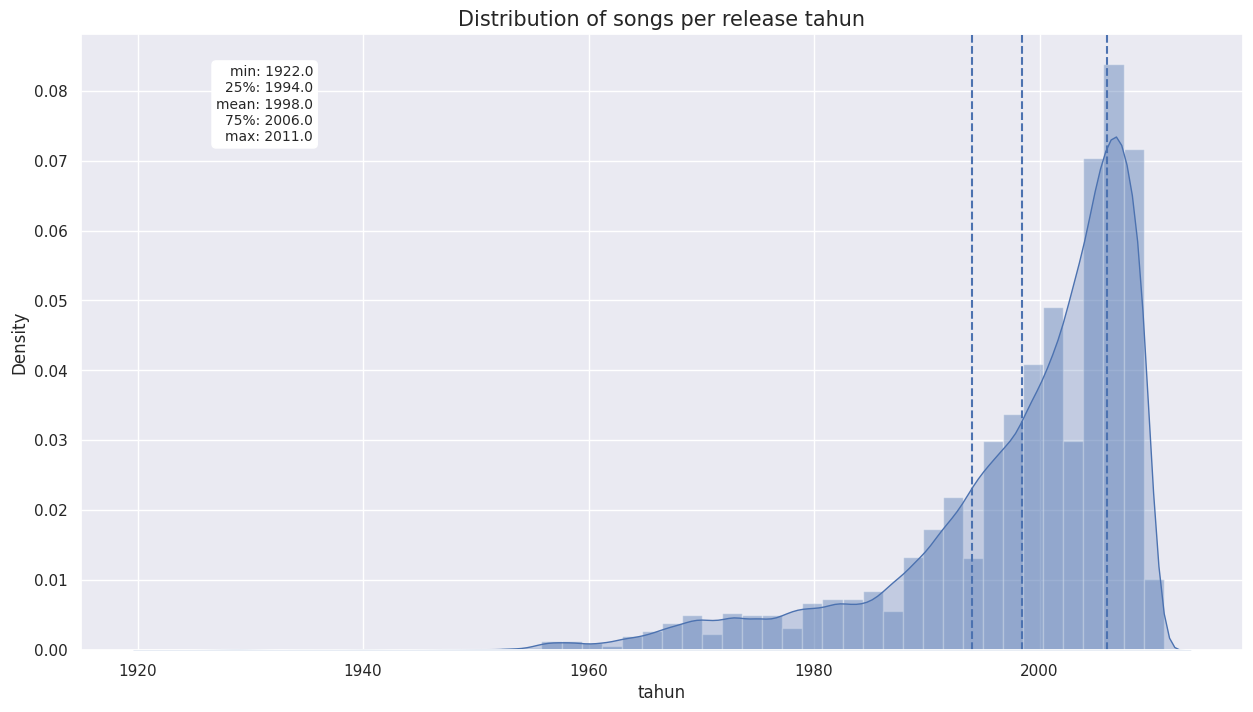

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

ax.set_title('Distribution of songs per release tahun', fontsize=15)
variable = data['tahun']

sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax)
des = data['tahun'].describe()
ax.axvline(des["25%"], ls='--')
ax.axvline(des["mean"], ls='--')
ax.axvline(des["75%"], ls='--')
ax.grid(True)

des = round(des).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax.text(0.20, 0.95, box, transform=ax.transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1));

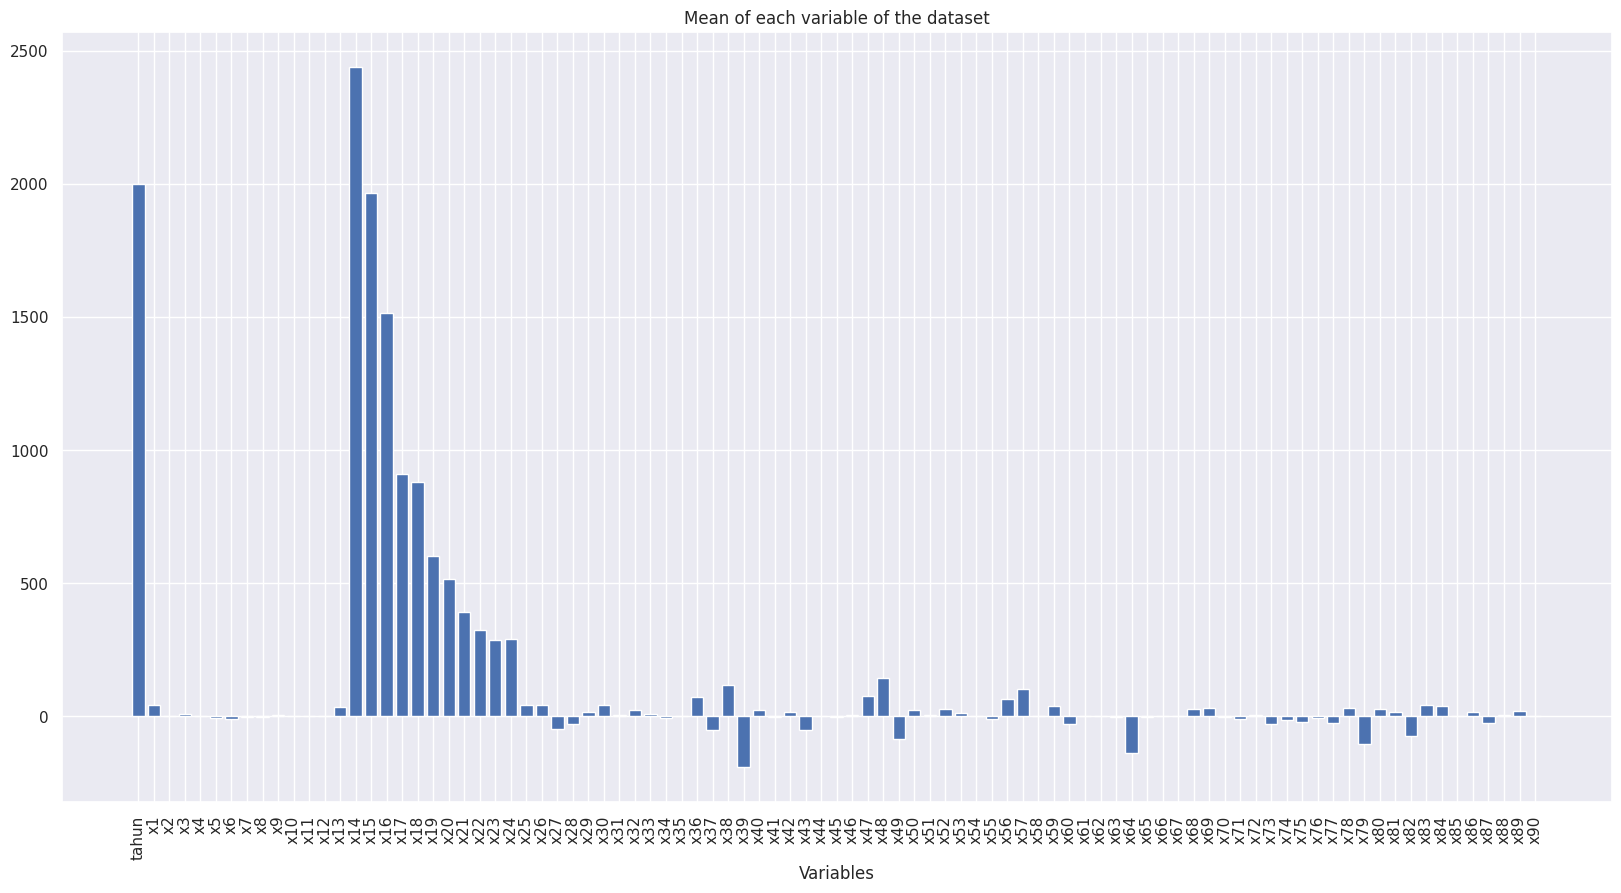

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(data.columns.map(str), data.mean().values)
ax.set_xlabel('Variables')
plt.xticks(rotation = 90)
plt.title('Mean of each variable of the dataset');

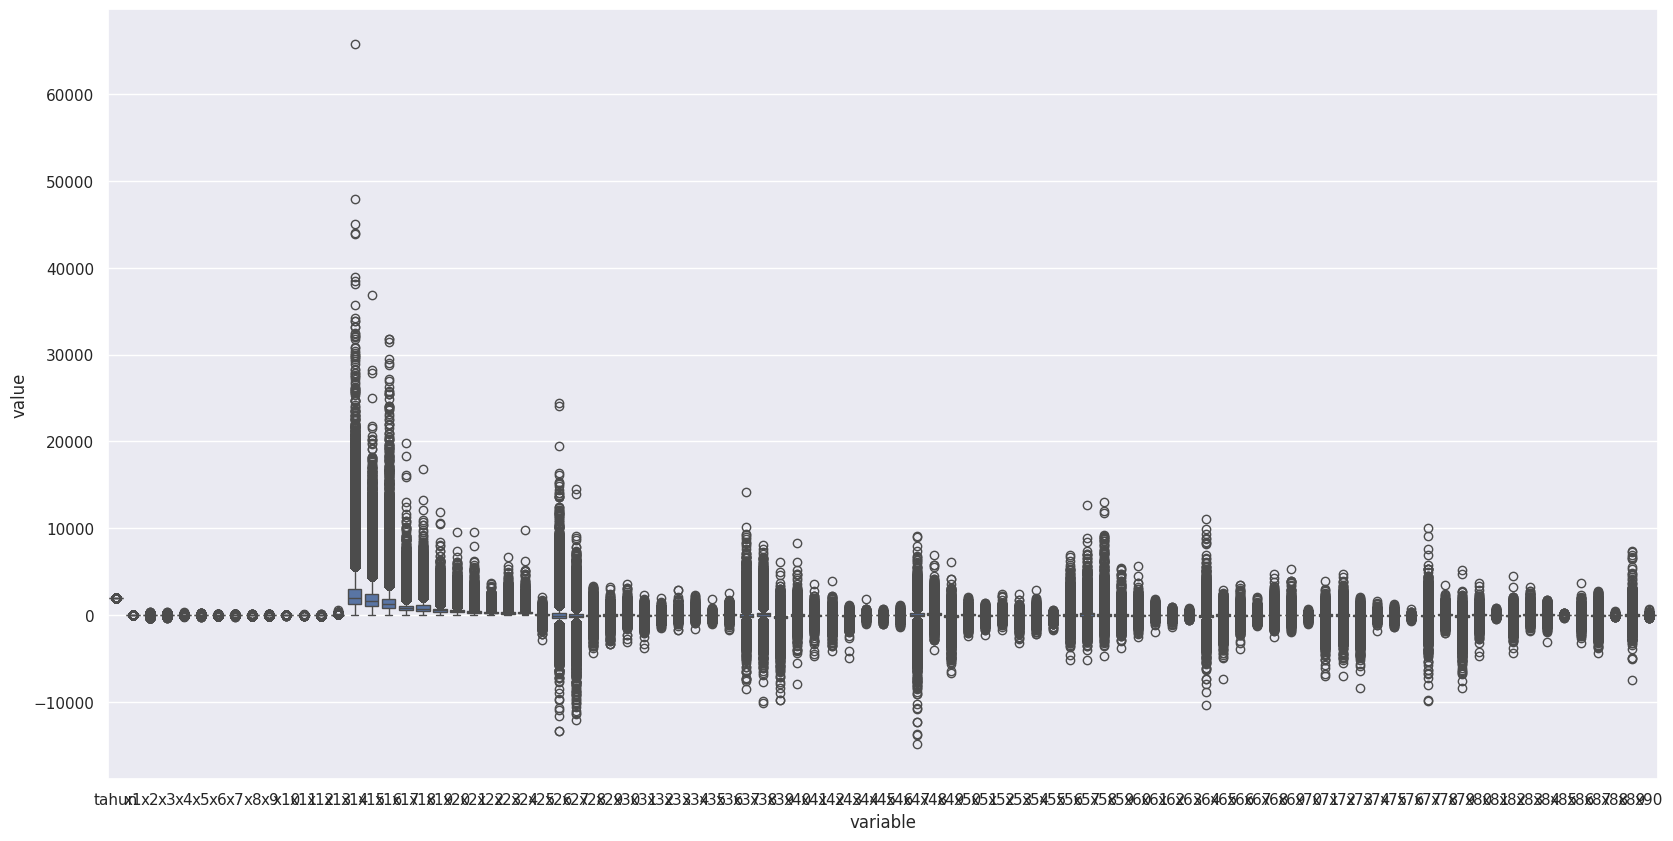

In [ ]:
data_melted = pd.melt(data)

sns.set(rc={"figure.figsize":(20, 10)}) #width=3, #height=4
sns.boxplot(x='variable', y='value', data=data_melted);

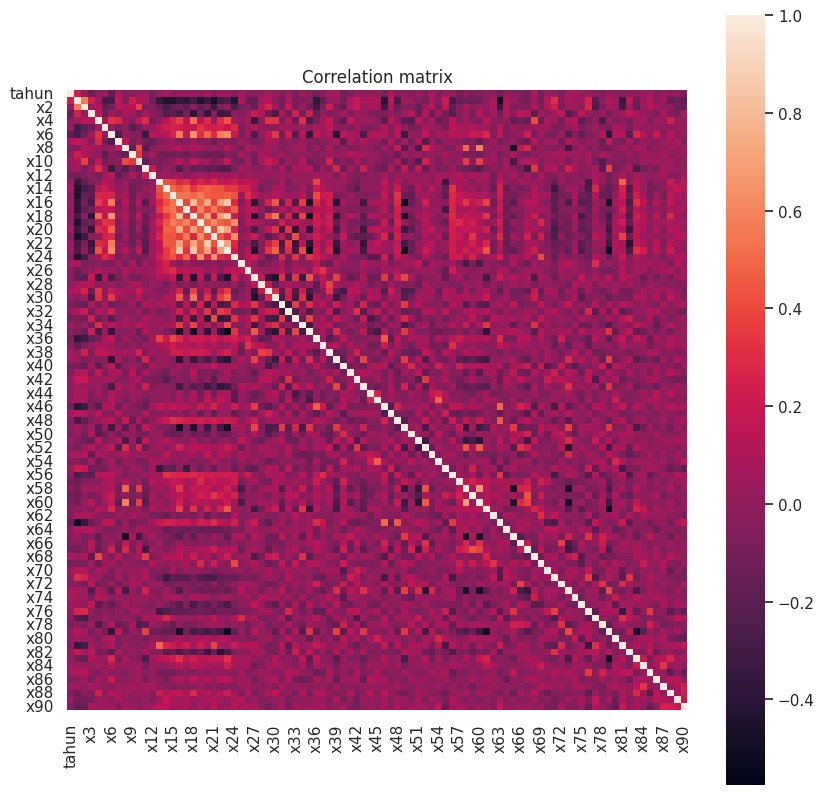

In [ ]:
# Correlation between the release tahun and features
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Correlation matrix")
sns.heatmap(corr, square=True);

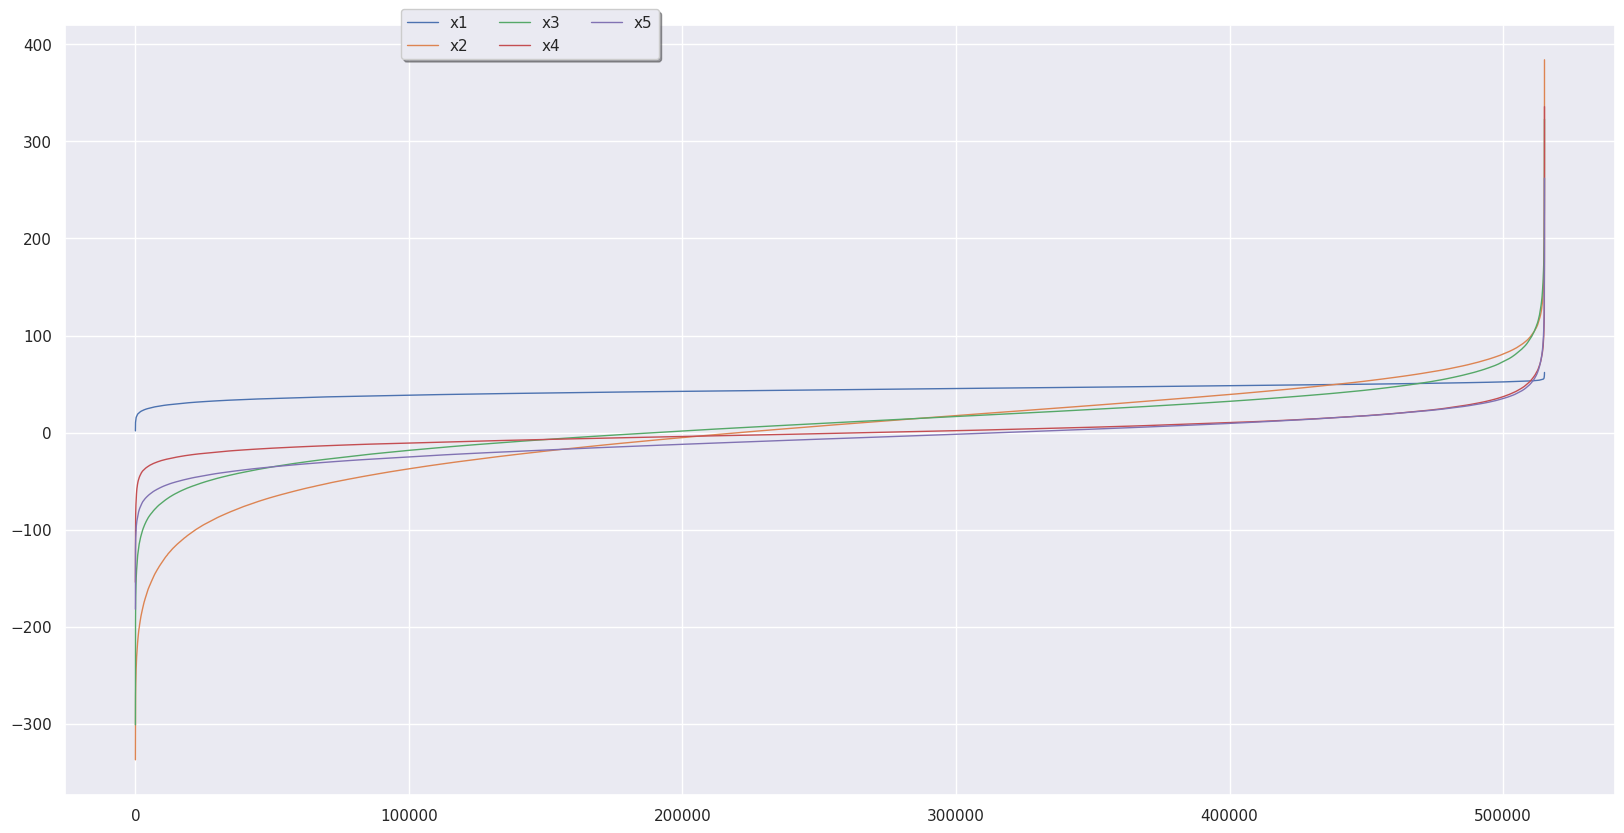

In [ ]:
for t in column_names[1:6]:
    y = data[t].to_numpy()
    plt.plot(sorted(y), label=t, linewidth=1)

plt.legend(loc='upper center', bbox_to_anchor=(0.3, 1.03), ncol=3, fancybox=True, shadow=True)


In [ ]:
X = data.iloc[:, 1:].to_numpy()
X = (X - X.min()) / (X.max() - X.min())

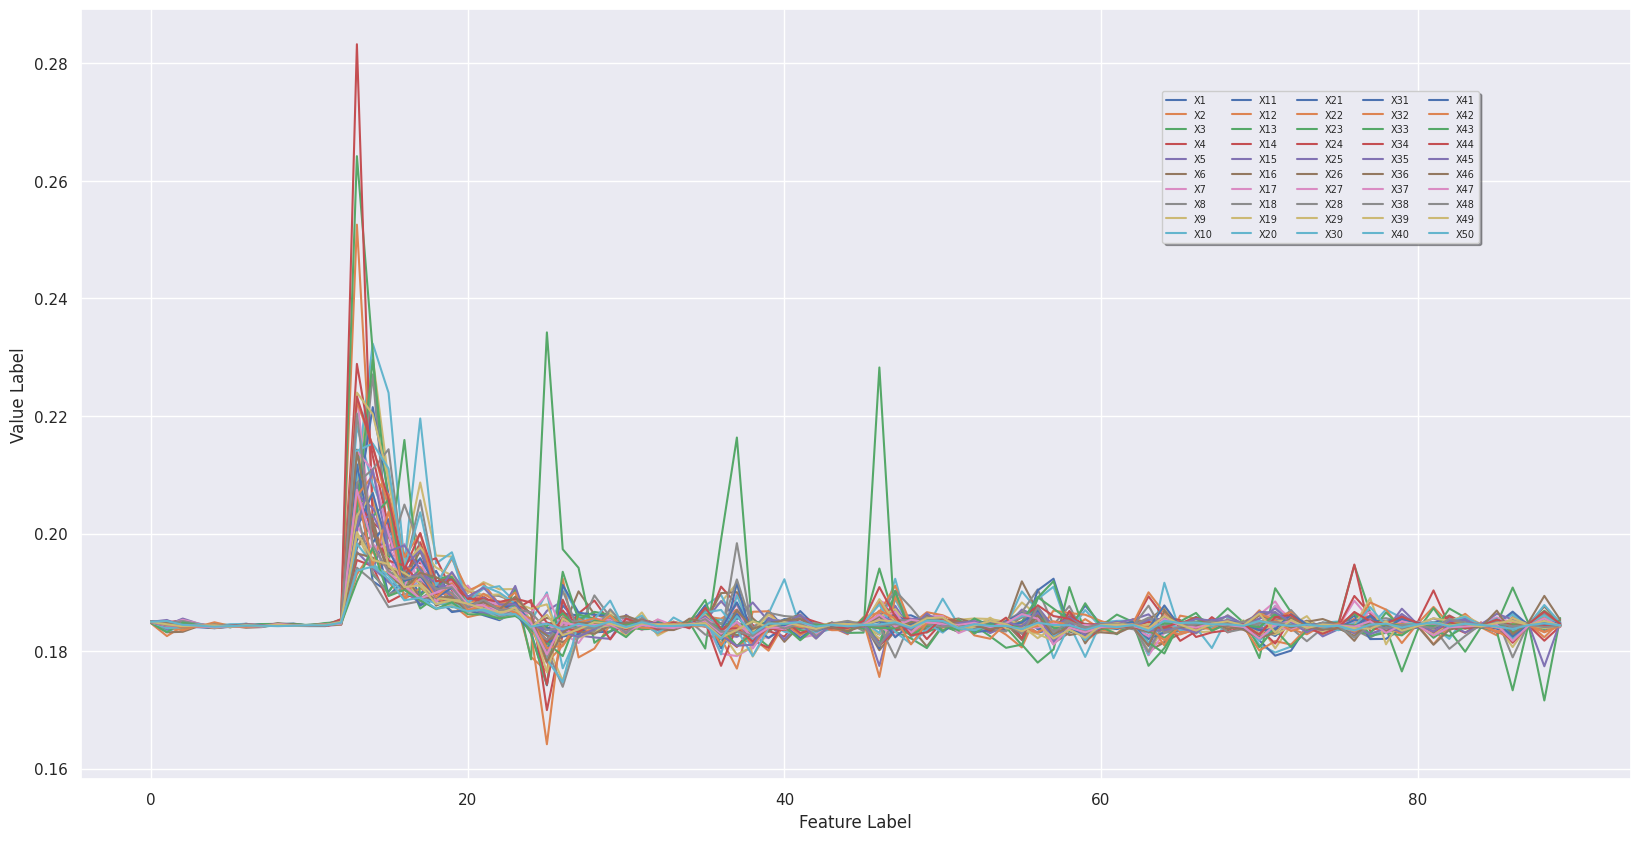

In [ ]:
for i in range(1, 51):
    plt.plot(X[i], label='X' + str(i))

plt.xlabel("Feature Label")
plt.ylabel("Value Label")
plt.legend(loc='upper center', bbox_to_anchor=(0.8, 0.9), ncol=5, fancybox=True, shadow=True, fontsize=7)

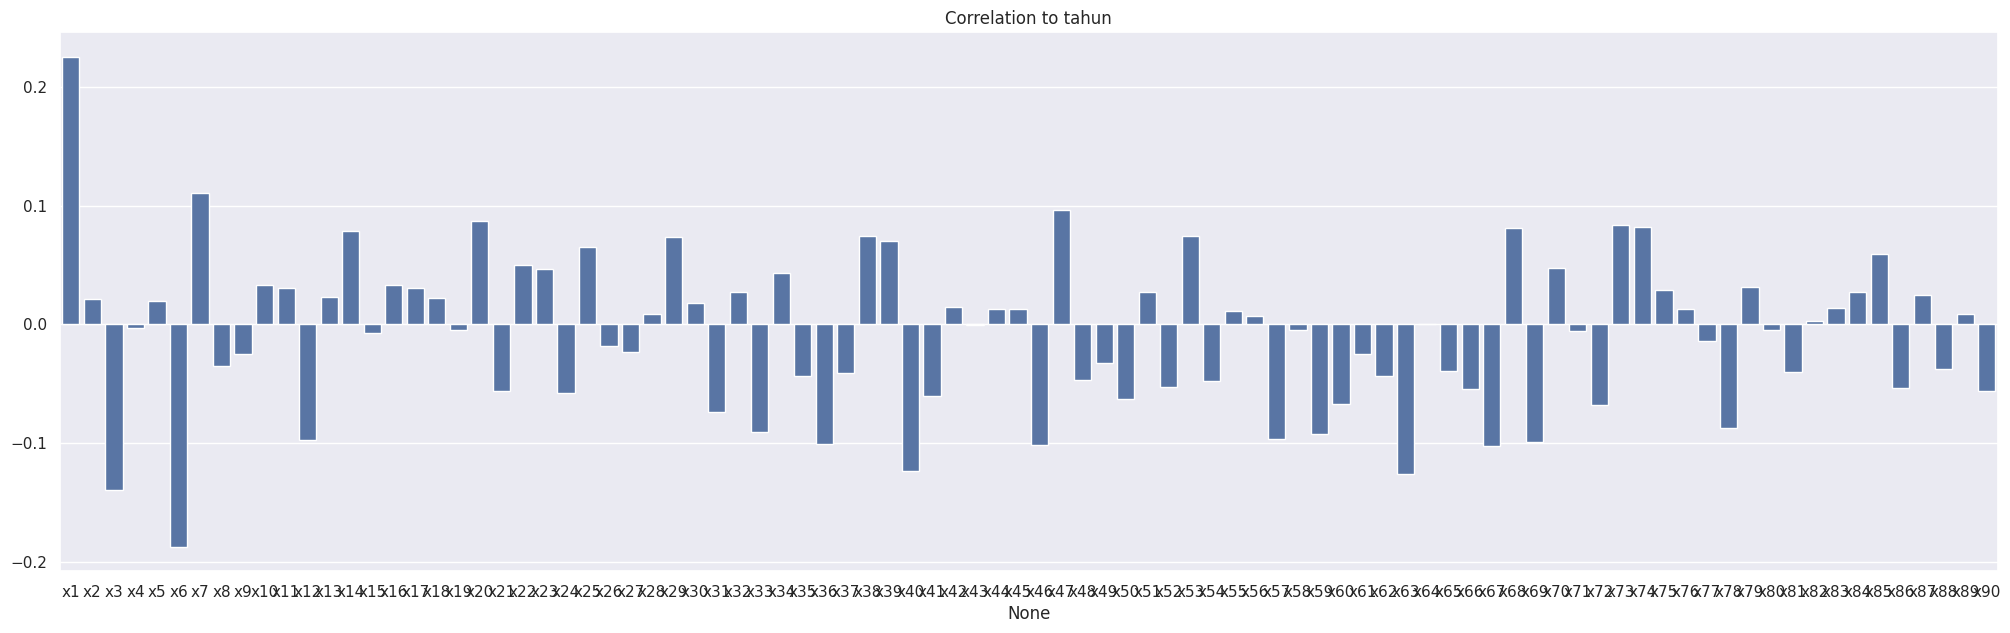

In [ ]:
fig, ax = plt.subplots(figsize=(25,7))
sns.barplot(x=corr['tahun'][1:].index, y=corr['tahun'][1:].values)
plt.title('Correlation to tahun');

## Splitting the data set
We split the data set into a training and a testing data set, before applying any pre-processing of the data,as it would otherwise put information from the testing set into the training set.

We follow the instruction given on the data set page on the UCI Machine Learning Repository and split the data set this way :

train: first 463,715 examples

test: last 51,630 examples

Which according to the website "avoids the 'producer effect' by making sure no song
from a given artist ends up in both the train and test set."

In [ ]:
data_train=data.iloc[:463715,:]
print(data_train.shape)
data_test=data.iloc[463715:,:]
print(data_test.shape)

(463715, 91)
(51416, 91)


In [ ]:
data_train.describe()

,tahun,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90
count,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,...,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000
mean,1998.386492,43.385407,1.253786,8.651491,1.130590,-6.513477,-9.566442,-2.383797,-1.794327,3.714622,...,15.740175,-73.056741,41.427345,37.781170,0.342891,17.606073,-26.376988,4.444885,19.730458,1.322372
std,10.940319,6.079760,51.612880,35.264853,16.334058,22.854770,12.836177,14.580237,7.961779,10.580375,...,32.084683,175.362246,121.792527,94.867284,16.153152,114.320593,174.182226,13.321224,184.831704,22.044238
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-318.223330
25%,1994.000000,39.957510,-26.161450,-11.441550,-8.514270,-20.635820,-18.469000,-10.774800,-6.461790,-2.303640,...,-1.799475,-139.033770,-20.916155,-4.709120,-6.759470,-31.552950,-101.404165,-2.571810,-59.598030,-8.814175
50%,2002.000000,44.262120,8.361490,10.472720,-0.691060,-5.993610,-11.209400,-2.047330,-1.736340,3.816840,...,9.156750,-52.876870,28.708940,33.494550,0.826490,15.557700,-21.138190,3.111350,7.588610,0.051050
75%,2006.000000,47.833710,36.136950,29.744940,8.756665,7.745720,-2.423955,6.516025,2.904145,9.950480,...,26.246725,13.621715,89.422160,77.669815,8.493320,67.745830,52.269985,9.948450,86.193755,9.670260
max,2011.000000,61.970140,384.065730,322.851430,289.527430,262.068870,119.815590,172.402680,105.210280,146.297950,...,840.973380,4469.454870,3210.701700,1672.647100,260.544900,3662.065650,2833.608950,463.419500,7393.398440,600.766240


In [ ]:
# create the scaler
ss = preprocessing.StandardScaler()

# create new dataframes to keep the non scaled ones
data_train_s=data_train.copy()
data_test_s=data_test.copy()

# apply the scaler to the dataframe subset
data_train_s.iloc[:,1:] = ss.fit_transform(data_train_s.iloc[:,1:])
data_test_s.iloc[:,1:] = ss.transform(data_test_s.iloc[:,1:])

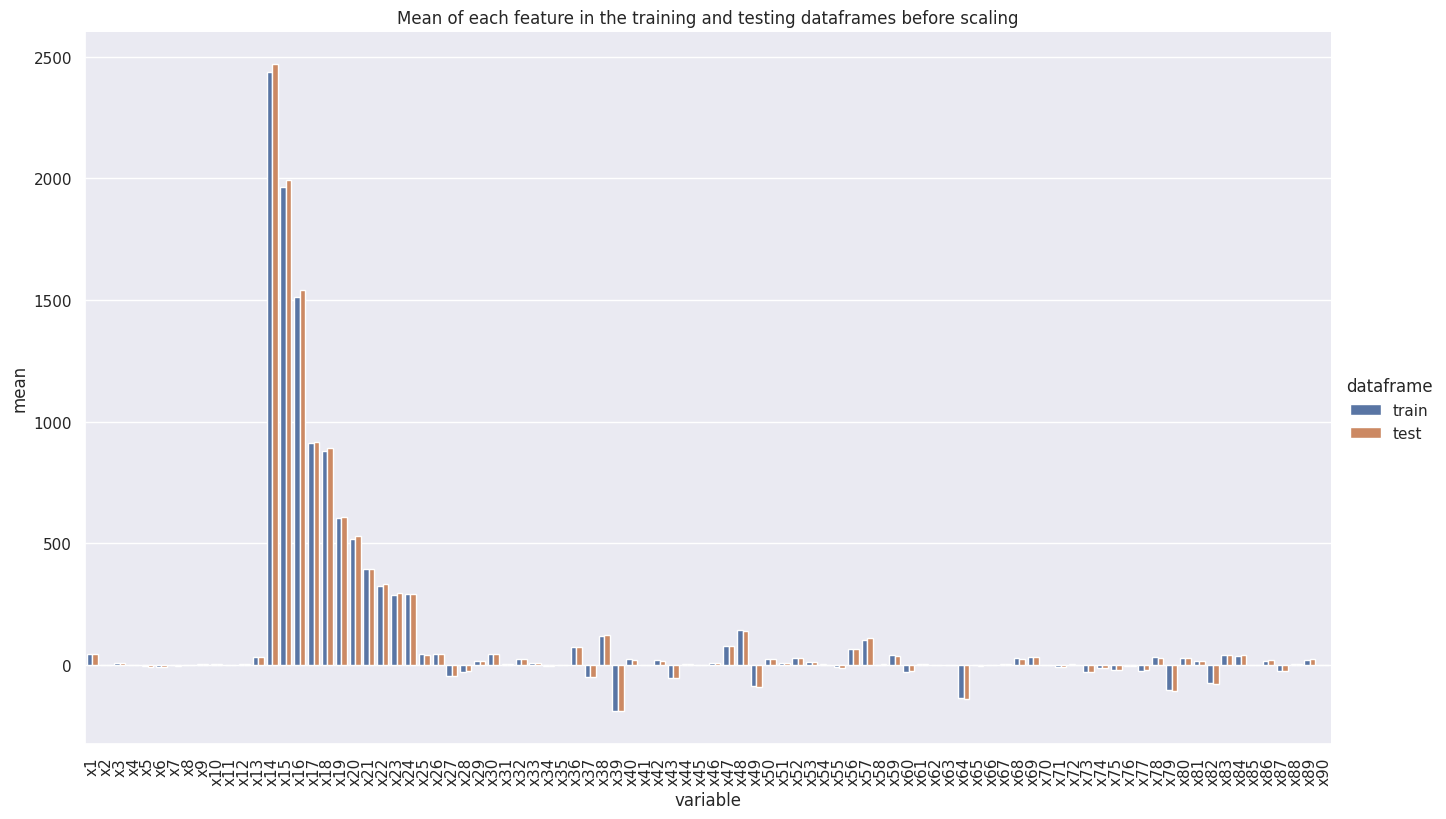

In [ ]:
means = pd.DataFrame(list(zip(data_train.columns, data_train.mean(), data_test.mean())),
                   columns=['variable', 'train', 'test'])
means.drop(0, inplace=True)

means = pd.melt(means, id_vars="variable", var_name="dataframe", value_name="mean")

sns.catplot(x='variable', y='mean', hue='dataframe', data=means, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Mean of each feature in the training and testing dataframes before scaling');

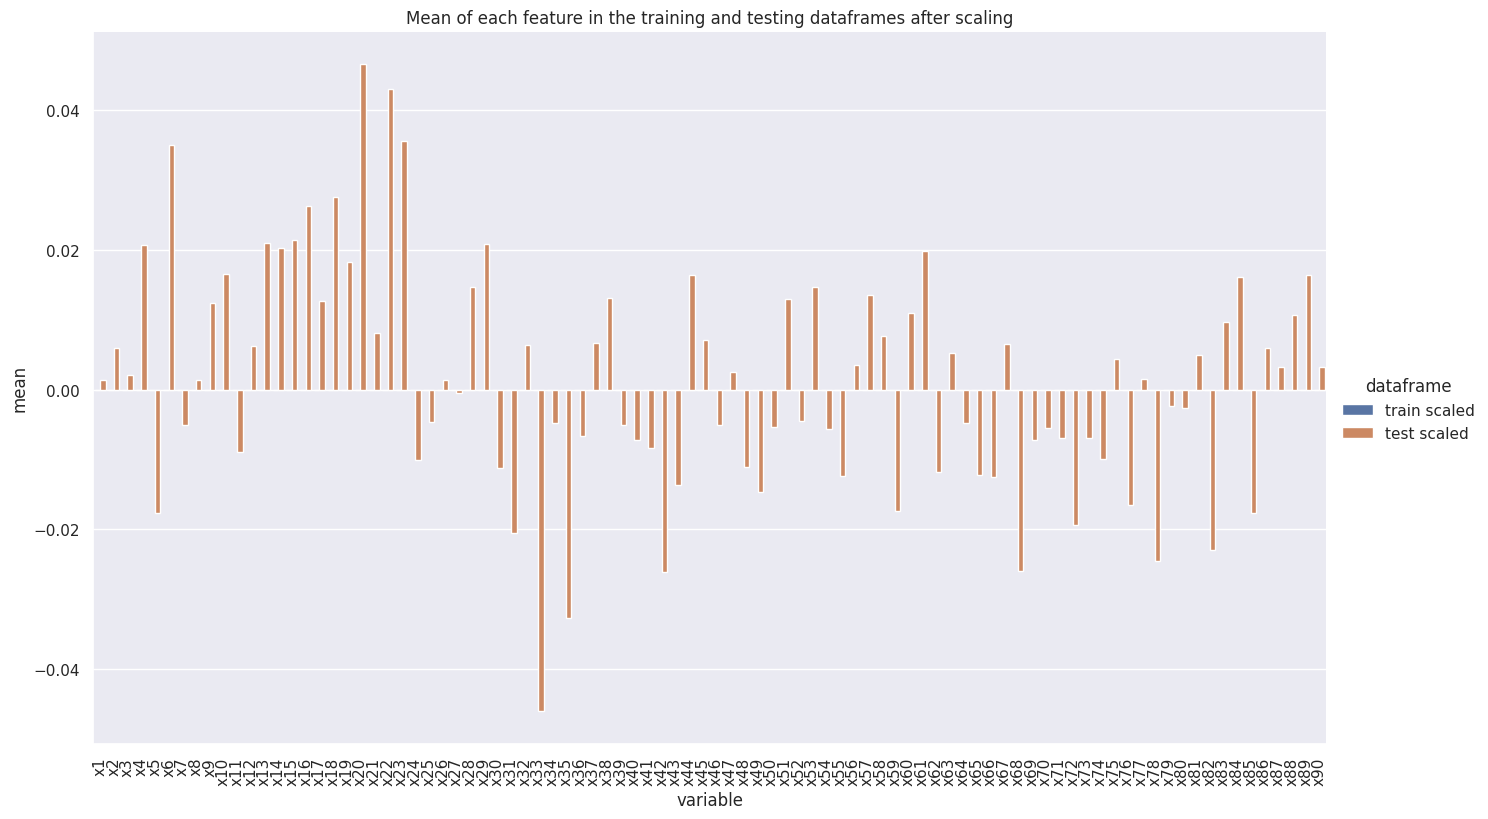

In [ ]:
means = pd.DataFrame(list(zip(data_train.columns, data_train_s.mean(), data_test_s.mean())),
                   columns=['variable', 'train scaled', 'test scaled'])
means.drop(0, inplace=True)

means = pd.melt(means, id_vars="variable", var_name="dataframe", value_name="mean")

sns.catplot(x='variable', y='mean', hue='dataframe', data=means, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Mean of each feature in the training and testing dataframes after scaling');

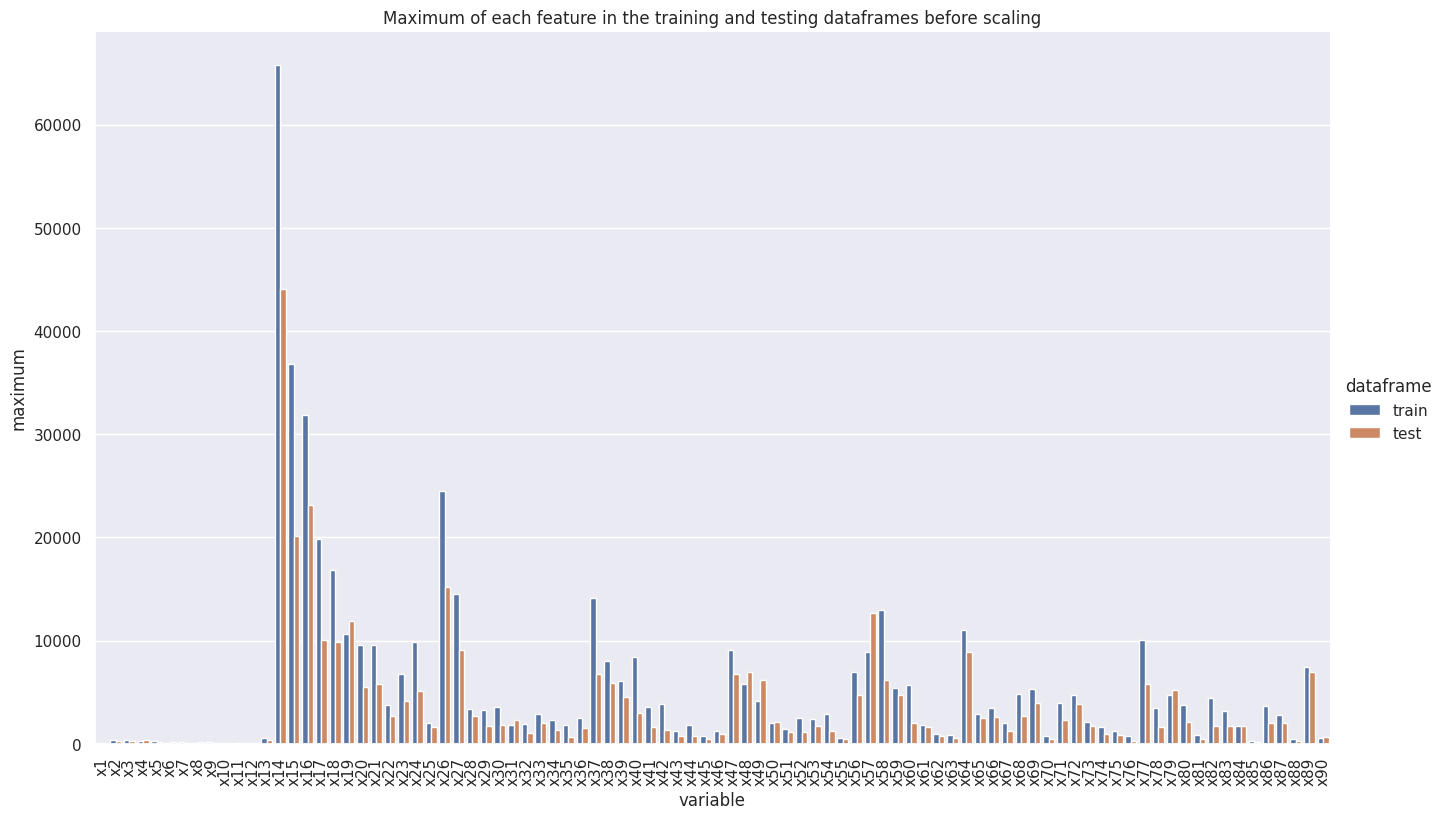

In [ ]:
maxi = pd.DataFrame(list(zip(data_train.columns, data_train.max(), data_test.max())),
                   columns=['variable', 'train', 'test'])
maxi.drop(0, inplace=True)

maxi = pd.melt(maxi, id_vars="variable", var_name="dataframe", value_name="maximum")

sns.catplot(x='variable', y='maximum', hue='dataframe', data=maxi, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Maximum of each feature in the training and testing dataframes before scaling');

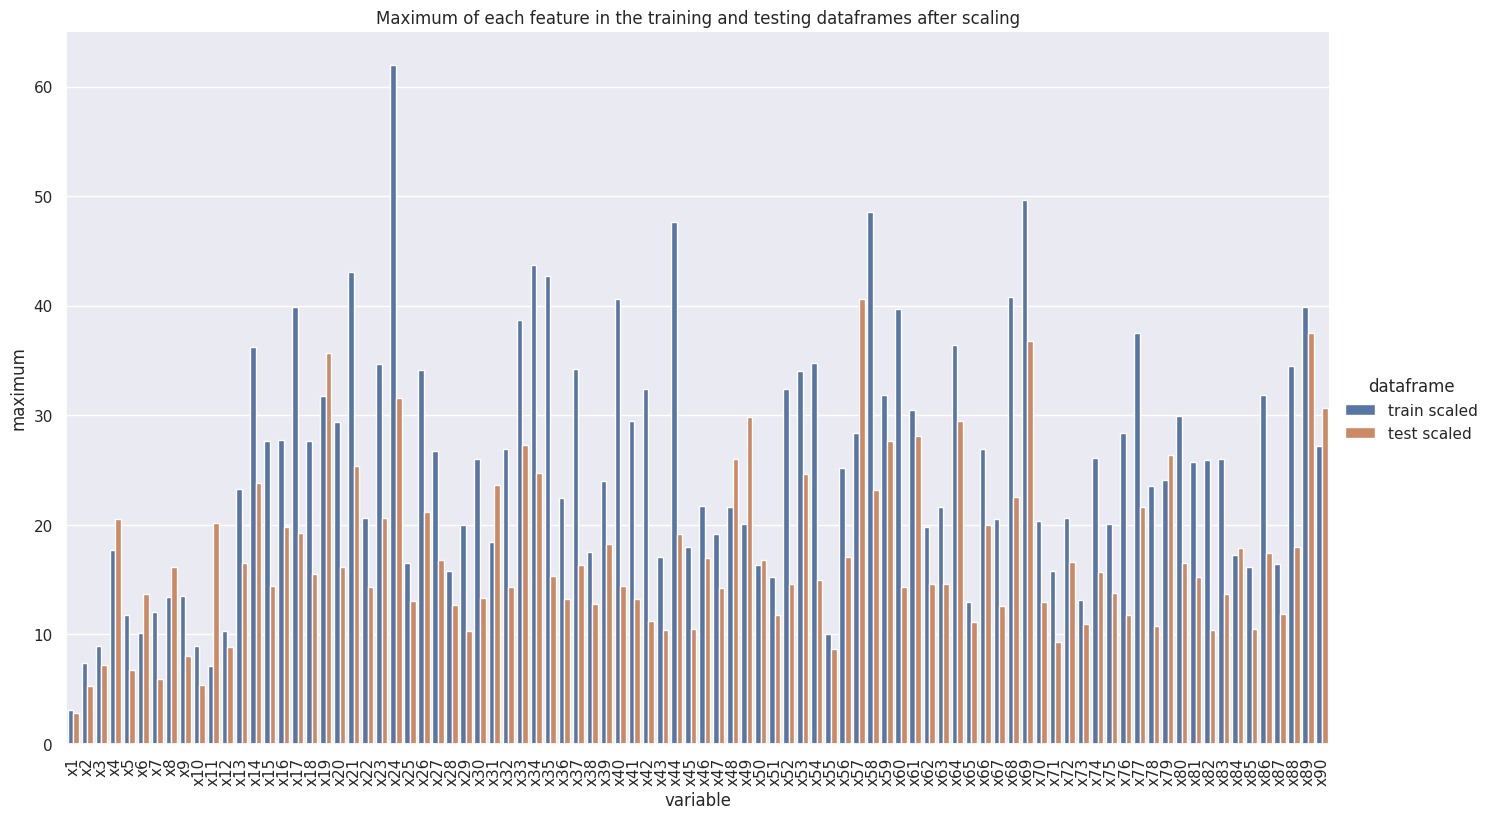

In [ ]:
maxi = pd.DataFrame(list(zip(data_train.columns, data_train_s.max(), data_test_s.max())),
                   columns=['variable', 'train scaled', 'test scaled'])
maxi.drop(0, inplace=True)

maxi = pd.melt(maxi, id_vars="variable", var_name="dataframe", value_name="maximum")

sns.catplot(x='variable', y='maximum', hue='dataframe', data=maxi, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Maximum of each feature in the training and testing dataframes after scaling');

In [ ]:
# Downsampling by 'tahun'
data_test_s=data_test_s[data_test_s.tahun>1949]
data_train_s=data_train_s[data_train_s.tahun>1949]

min_samples = 1000
tahuns = data_train_s.tahun.unique()
sampled_dfs = []  # List to store each sampled DataFrame

for tahun in tahuns:
    if data_train_s[data_train_s.tahun == tahun].shape[0] > min_samples:
        sampled_dfs.append(data_train_s[data_train_s.tahun == tahun].sample(min_samples))
    else:
        sampled_dfs.append(data_train_s[data_train_s.tahun == tahun])

# Concatenate all sampled DataFrames at once
data_train_sampled = pd.concat(sampled_dfs, ignore_index=True)


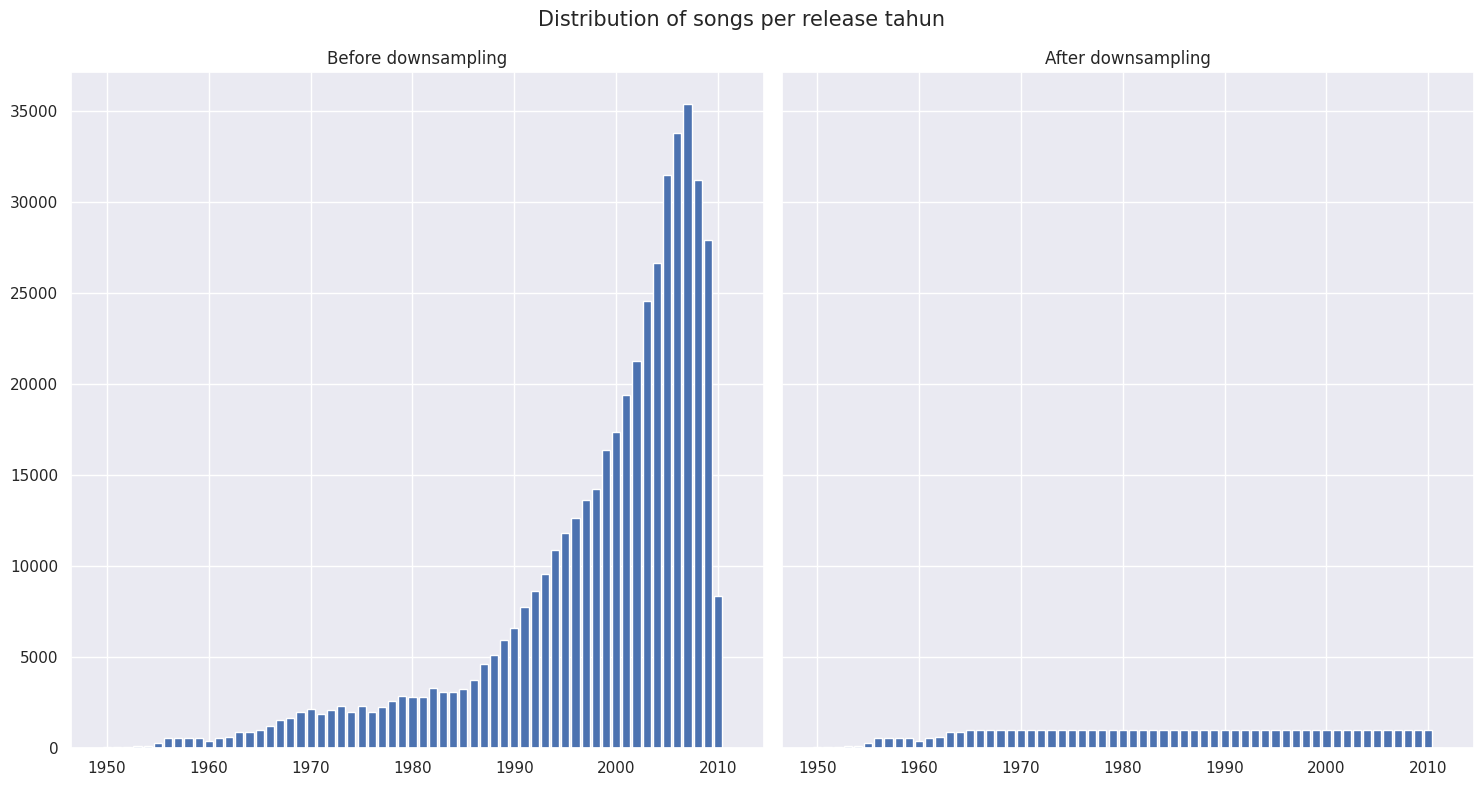

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,8))
fig.suptitle('Distribution of songs per release tahun', fontsize=15)

ax[0].bar(data_train_s.tahun.value_counts().index, data_train_s.tahun.value_counts())
ax[0].set_title('Before downsampling')

ax[1].bar(data_train_s.tahun.value_counts().index, data_train_sampled.tahun.value_counts())
ax[1].set_title('After downsampling')

plt.tight_layout()

In [ ]:
del data

In [ ]:
data_train_s.shape
data_train_sampled.shape

(52040, 91)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# we separate the target from the features
X_train = data_train_s.iloc[:,1:]
y_train = data_train_s.iloc[:,0]

model = ExtraTreesClassifier(n_estimators=10, max_depth=10, warm_start=True)
for i in range(10, 51, 10):  # Increasing trees gradually
    model.n_estimators = i
    model.fit(X_train, y_train)


<Axes: >

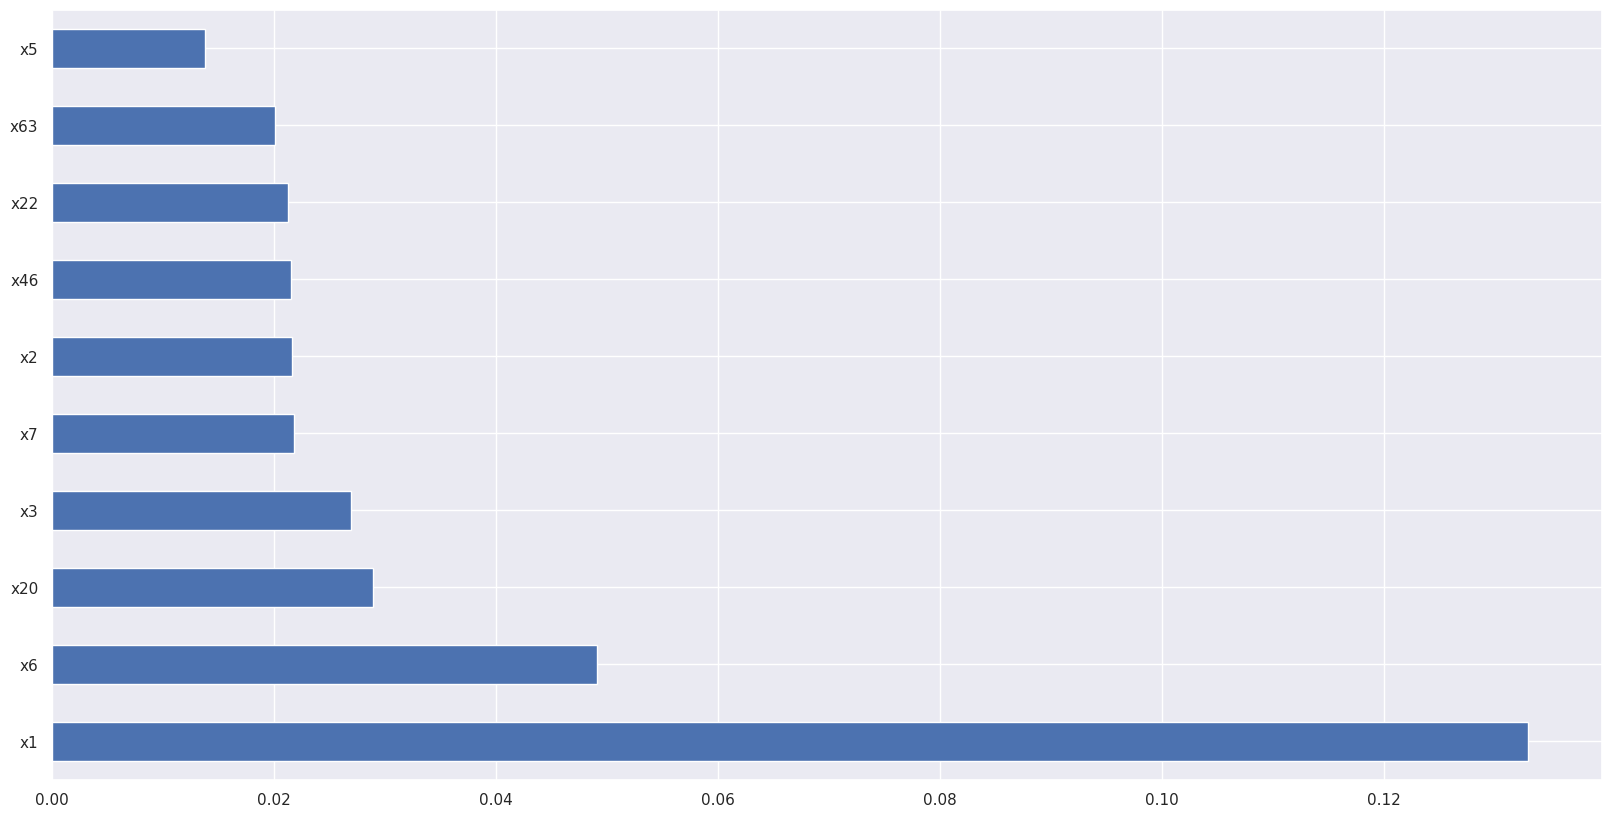

In [ ]:
# graph of the 10 most important features
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

<Axes: >

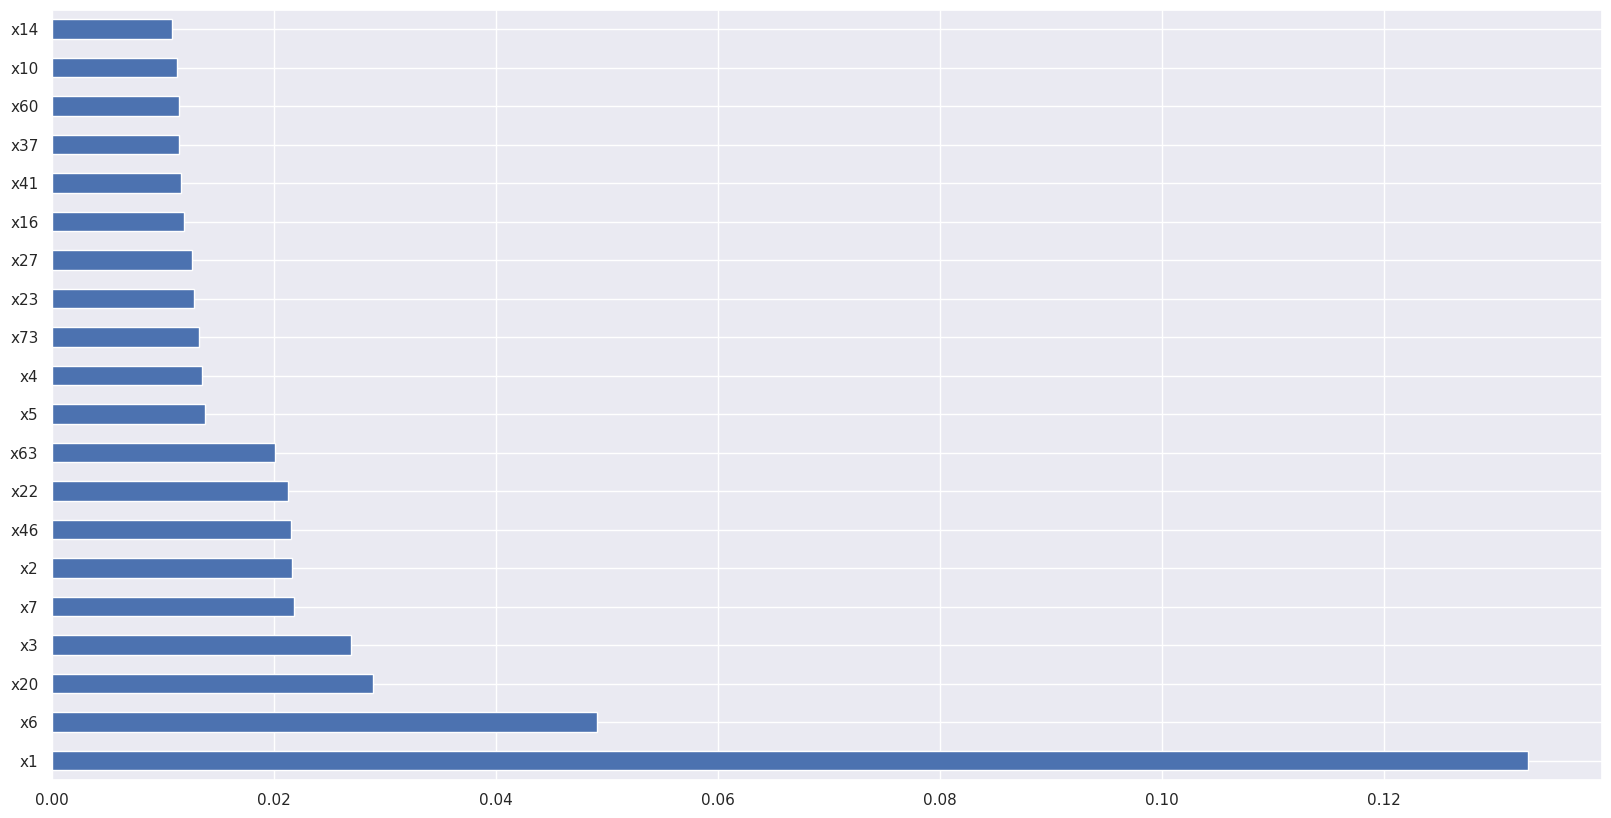

In [ ]:
# graph of the 20 most important features
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
names10=['tahun']
names10.extend(list(feat_importances.nlargest(10).index.sort_values()))
names10

['tahun', 'x1', 'x2', 'x20', 'x22', 'x3', 'x46', 'x5', 'x6', 'x63', 'x7']

In [ ]:
names20=['tahun']
names20.extend(list(feat_importances.nlargest(20).index.sort_values()))
names20

['tahun',
 'x1',
 'x10',
 'x14',
 'x16',
 'x2',
 'x20',
 'x22',
 'x23',
 'x27',
 'x3',
 'x37',
 'x4',
 'x41',
 'x46',
 'x5',
 'x6',
 'x60',
 'x63',
 'x7',
 'x73']

In [ ]:
# Test dataframes scaled and with the target and the 10 most important features
data_test_10ft=data_test_s[names10]

# Test dataframes scaled and with the target and the 20 most important features
data_test_20ft=data_test_s[names20]

# Train dataframe scaled, but not downsampled, with the target and the 10 most important features
data_train_10ft=data_train_s[names10]

# Train dataframe scaled, but not downsampled, with the target and the 20 most important features
data_train_20ft=data_train_s[names20]

# Train dataframe scaled and downsampled, with the target and the 10 most important features
data_train_samp_10ft=data_train_sampled[names10]

# Train dataframe scaled and downsampled, with the target and the 20 most important features
data_train_samp_20ft=data_train_sampled[names20]

In [ ]:
data_train_samp_10ft.head()

,tahun,x1,x2,x20,x22,x3,x46,x5,x6,x63,x7
0,2001,0.383143,-0.106708,0.176173,0.052225,-0.105304,0.051985,-0.979129,-0.292134,-0.289625,1.226941
1,2001,-1.008461,-0.730988,2.820316,1.435096,-0.742522,-0.648698,-0.112505,6.497252,0.287601,-2.082731
2,2001,0.323579,1.214733,-0.776437,-0.738655,0.147836,-0.483663,-1.767859,0.962985,-2.150842,0.623947
3,2001,1.178052,-0.018176,-0.727786,-0.659439,2.373447,-0.282079,-0.831566,-0.738760,0.026879,1.581406
4,2001,0.760870,0.819462,-1.073806,-1.229710,0.974157,-1.482930,-0.462532,-1.307199,-0.147375,0.852340


In [ ]:
data_train_samp_20ft.head()

,tahun,x1,x10,x14,x16,x2,x20,x22,x23,x27,...,x37,x4,x41,x46,x5,x6,x60,x63,x7,x73
0,2001,0.383143,-1.008088,0.289314,-0.253408,-0.106708,0.176173,0.052225,-0.526241,0.083888,...,-1.275979,-0.983474,-1.049775,0.051985,-0.979129,-0.292134,-0.180993,-0.289625,1.226941,0.618466
1,2001,-1.008461,2.819458,-0.987532,6.401624,-0.730988,2.820316,1.435096,5.385049,-7.119755,...,-1.476355,4.749395,-3.355349,-0.648698,-0.112505,6.497252,2.415014,0.287601,-2.082731,-4.270725
2,2001,0.323579,-0.887767,-0.669648,-0.417156,1.214733,-0.776437,-0.738655,-0.536218,-0.176567,...,-0.225665,-0.139732,0.016973,-0.483663,-1.767859,0.962985,-0.140152,-2.150842,0.623947,-0.343069
3,2001,1.178052,-1.005974,-0.818592,-0.841764,-0.018176,-0.727786,-0.659439,-0.871200,0.101079,...,-0.187687,1.301354,-0.134621,-0.282079,-0.831566,-0.738760,-0.129698,0.026879,1.581406,0.196694
4,2001,0.760870,0.946425,1.429180,-0.619997,0.819462,-1.073806,-1.229710,-0.672390,0.433198,...,0.041025,0.401861,0.217772,-1.482930,-0.462532,-1.307199,-0.041175,-0.147375,0.852340,-0.154310


In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

# Initialize an empty DataFrame for storing metrics
data_metrics = pd.DataFrame(columns=["Model", "ExplainedVariance", "MeanAbsoluteError", "MSE", "RMSE", "R2", "R2_Adj"])



In [ ]:
# Define metric function
def metric(modelName, y_test, y_pred):
    explained_variance = metrics.explained_variance_score(y_test, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    # Ensure len(y_test) > 91 to avoid division by zero in adjusted R^2 calculation
    r2_adj = 1 - ((1 - r2) * (len(y_test) - 1) / (len(y_test) - 91)) if len(y_test) > 91 else np.nan
    return (modelName, explained_variance, mean_absolute_error, mse, rmse, r2, r2_adj)



In [ ]:
# Example dataset pairs - adjust these to your actual datasets
datasets = [
    (data_test_10ft, data_train_10ft, "test10ft", "train10ft"),
    (data_test_10ft, data_train_samp_10ft, "test10ft", "trainsamp10ft"),
    (data_test_20ft, data_train_20ft, "test20ft", "train20ft"),
    (data_test_20ft, data_train_samp_20ft, "test20ft", "trainsamp20ft")
]

In [ ]:
# Define each model separately
model1 = LinearRegression()
model2 = AdaBoostRegressor()
model3 = BaggingRegressor()
model4 = ExtraTreesRegressor()
model5 = GradientBoostingRegressor()
model6 = RandomForestRegressor()

In [ ]:
# Model-dataset specific training and metric calculations
def process_model(model, test, train, test_name, train_name):
    global data_metrics
    # Train the model
    mod = model.fit(train.iloc[:, 1:], train.iloc[:, 0])
    # Predict and round to 0 decimal places
    y_pred = np.round(mod.predict(test.iloc[:, 1:]), 0)

    # Check if y_pred contains NaN values or is empty
    if np.isnan(y_pred).any() or len(y_pred) == 0:
        return None

    # Generate a name and compute metrics
    model_name = f"{str(model)} ; {test_name} ; {train_name}"
    metrics_data = metric(model_name, test.iloc[:, 0], y_pred)

    # Create a DataFrame for the new row
    new_row = pd.DataFrame([dict(zip(data_metrics.columns, metrics_data))])

    data_metrics = pd.concat([data_metrics, new_row], ignore_index=True)



In [ ]:
# Execute each model and dataset pairing without loops
process_model(model1, *datasets[0])
process_model(model1, *datasets[1])
process_model(model1, *datasets[2])
process_model(model1, *datasets[3])


<ipython-input-124-b4eb7470136f>:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_metrics = pd.concat([data_metrics, new_row], ignore_index=True)


In [ ]:
process_model(model2, *datasets[0])
process_model(model2, *datasets[1])
process_model(model2, *datasets[2])
process_model(model2, *datasets[3])

In [ ]:
process_model(model3, *datasets[0])
process_model(model3, *datasets[1])
process_model(model3, *datasets[2])
process_model(model3, *datasets[3])

In [ ]:
process_model(model4, *datasets[0])
process_model(model4, *datasets[1])
process_model(model4, *datasets[2])
process_model(model4, *datasets[3])

In [ ]:
process_model(model5, *datasets[0])
process_model(model5, *datasets[1])
process_model(model5, *datasets[2])
process_model(model5, *datasets[3])

In [ ]:
process_model(model6, *datasets[0])
process_model(model6, *datasets[1])
process_model(model6, *datasets[2])
process_model(model6, *datasets[3])

In [ ]:
data_metrics


,Model,ExplainedVariance,MeanAbsoluteError,MSE,RMSE,R2,R2_Adj
0,LinearRegression() ; test10ft ; train10ft,0.151659,7.060477,94.553122,9.723843,0.151608,0.150117
1,LinearRegression() ; test10ft ; trainsamp10ft,0.016778,13.413113,236.126449,15.366407,-1.118680,-1.122402
2,LinearRegression() ; test20ft ; train20ft,0.180854,6.905543,91.296113,9.554900,0.180832,0.179393
3,LinearRegression() ; test20ft ; trainsamp20ft,-0.044159,12.983419,227.928534,15.097302,-1.045123,-1.048716
4,AdaBoostRegressor() ; test10ft ; train10ft,0.106645,9.392908,124.050521,11.137797,-0.113062,-0.115017
5,AdaBoostRegressor() ; test10ft ; trainsamp10ft,0.095906,14.772002,264.705290,16.269766,-1.375108,-1.379281
6,AdaBoostRegressor() ; test20ft ; train20ft,0.113824,9.473570,125.694593,11.211360,-0.127814,-0.129795
7,AdaBoostRegressor() ; test20ft ; trainsamp20ft,0.112045,14.775957,263.812450,16.242304,-1.367097,-1.371255
8,BaggingRegressor() ; test10ft ; train10ft,0.136130,7.070200,96.533658,9.825154,0.133837,0.132316
9,BaggingRegressor() ; test10ft ; trainsamp10ft,-0.134751,12.133327,221.496951,14.882774,-0.987415,-0.990906


In [ ]:
data_metrics.sort_values("MeanAbsoluteError")

,Model,ExplainedVariance,MeanAbsoluteError,MSE,RMSE,R2,R2_Adj
14,ExtraTreesRegressor() ; test20ft ; train20ft,0.259493,6.540185,82.806644,9.099816,0.257005,0.255700
22,RandomForestRegressor() ; test20ft ; train20ft,0.247961,6.560565,84.050365,9.167899,0.245845,0.244521
18,GradientBoostingRegressor() ; test20ft ; train...,0.236180,6.595811,85.135236,9.226876,0.236111,0.234769
12,ExtraTreesRegressor() ; test10ft ; train10ft,0.223755,6.717331,86.808242,9.317094,0.221100,0.219732
16,GradientBoostingRegressor() ; test10ft ; train...,0.214877,6.720234,87.510414,9.354700,0.214800,0.213420
20,RandomForestRegressor() ; test10ft ; train10ft,0.212404,6.746206,88.013385,9.381545,0.210287,0.208899
10,BaggingRegressor() ; test20ft ; train20ft,0.180587,6.859971,91.553044,9.568336,0.178526,0.177083
2,LinearRegression() ; test20ft ; train20ft,0.180854,6.905543,91.296113,9.554900,0.180832,0.179393
0,LinearRegression() ; test10ft ; train10ft,0.151659,7.060477,94.553122,9.723843,0.151608,0.150117
8,BaggingRegressor() ; test10ft ; train10ft,0.136130,7.070200,96.533658,9.825154,0.133837,0.132316


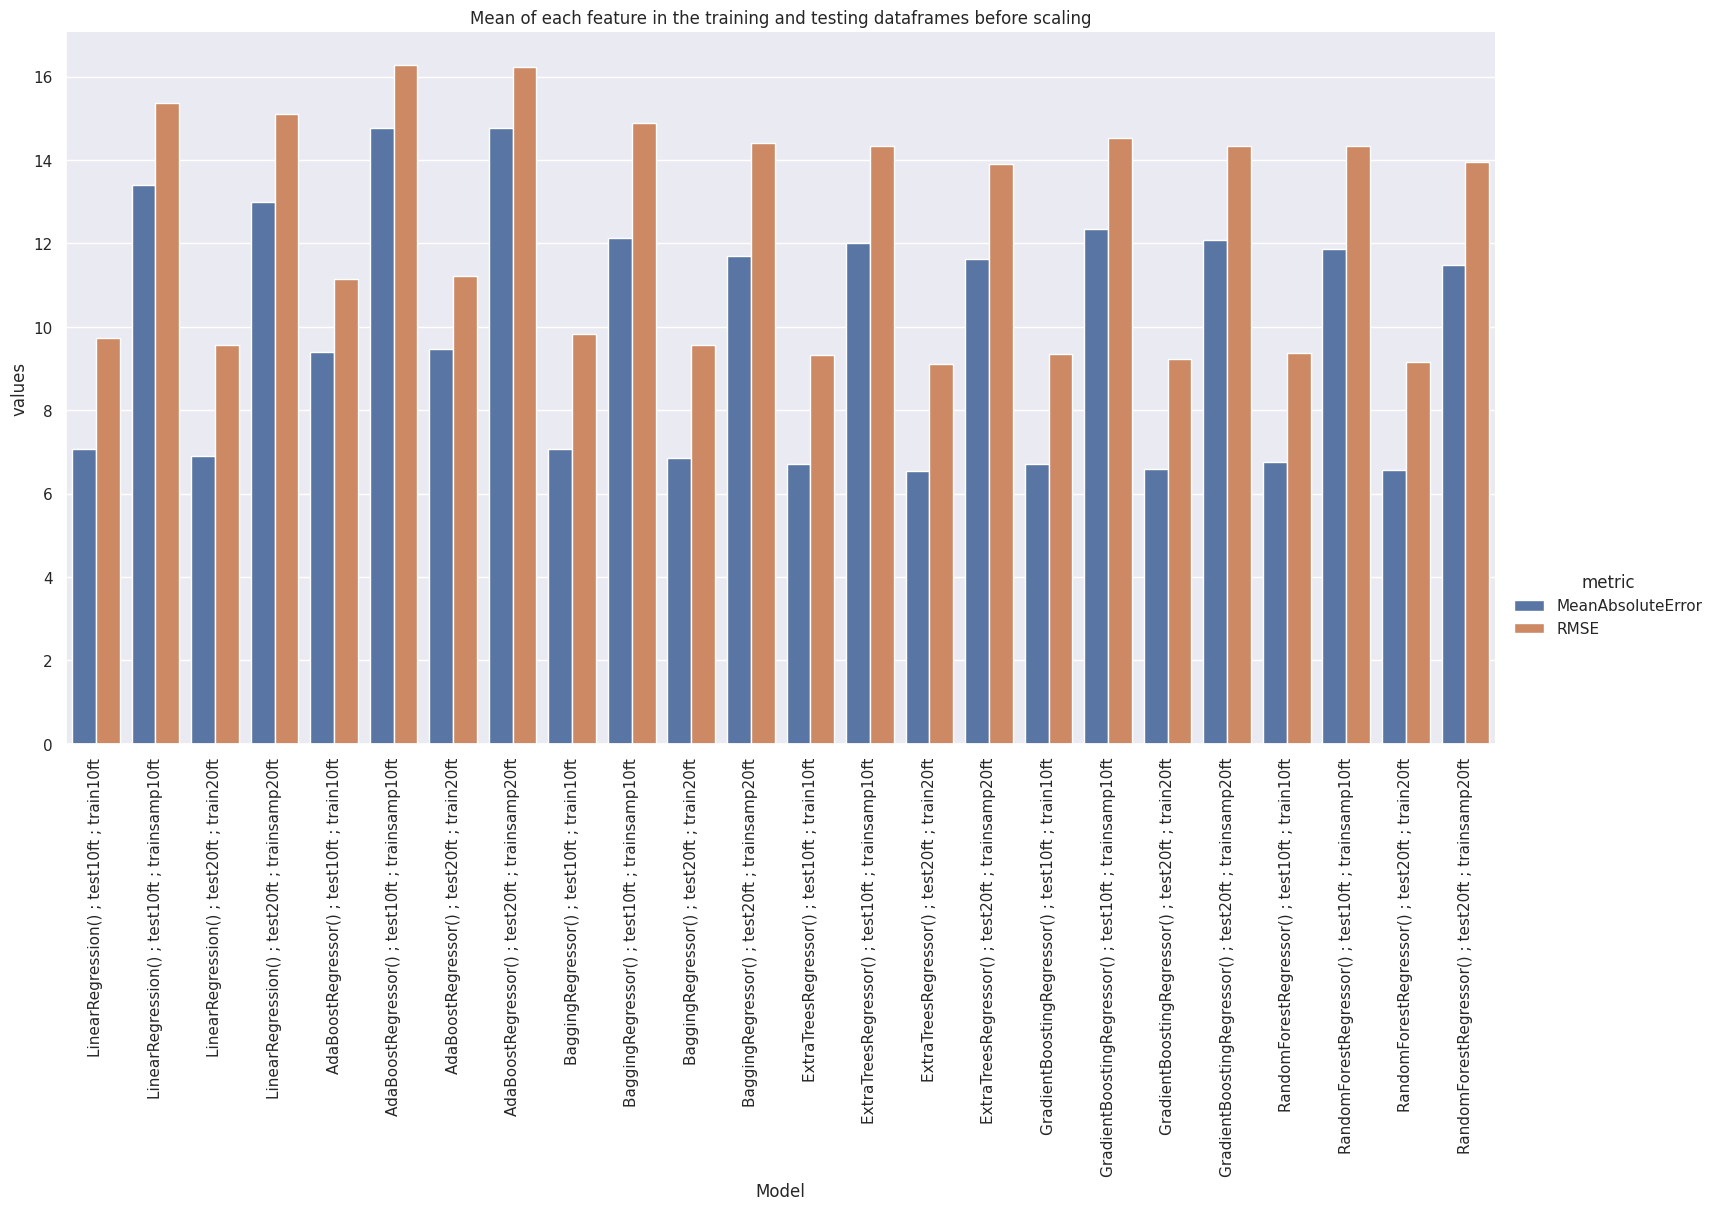

In [ ]:
compare = pd.melt(data_metrics[['Model', 'MeanAbsoluteError', 'RMSE']], id_vars="Model", var_name="metric", value_name="values")
sns.catplot(x='Model', y='values', hue='metric', data=compare, kind='bar', height=8, aspect=2)
plt.xticks(rotation = 90)
plt.title('Mean of each feature in the training and testing dataframes before scaling');